In [1]:
import pandas as pd
import datetime as dt
import pandasql as ps
import os
import zipfile as zp
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib

DIR=r'C:\Users\anuj\Downloads'
ZIp='archive (6).zip'

os.chdir(DIR)
zf = zp.ZipFile(f'{ZIp}')

dfs={}
for name in zf.namelist():
    df_name= name.replace('-','_')
    df_name= df_name.replace('.csv','')
    dfs[df_name]=pd.read_csv(zf.open(name,mode='r'),encoding='latin')
    
#df1.columns=df1.columns.str.replace(' ','_')

#df=dfs['Top3000_imdb_indian_movies']

#df.columns=df.columns.str.replace(' ','_')





### Manipulating Data/Restructuring Data

In [2]:

dropout_ratio_2012_2015=dfs['dropout_ratio_2012_2015']
dropout_ratio_2012_2015.columns=dropout_ratio_2012_2015.columns.str.replace(' ','_')
dropout_ratio_2012_2015.columns=dropout_ratio_2012_2015.columns.str.upper()
gross_enrollment_ratio_2013_2016=dfs['gross_enrollment_ratio_2013_2016']
gross_enrollment_ratio_2013_2016.columns=gross_enrollment_ratio_2013_2016.columns.str.replace(' ','_')
gross_enrollment_ratio_2013_2016.columns=gross_enrollment_ratio_2013_2016.columns.str.upper()
percentage_of_schools_with_comps_2013_2016=dfs['percentage_of_schools_with_comps_2013_2016']
percentage_of_schools_with_comps_2013_2016.columns=percentage_of_schools_with_comps_2013_2016.columns.str.replace(' ','_')
percentage_of_schools_with_comps_2013_2016.columns=percentage_of_schools_with_comps_2013_2016.columns.str.upper()
percentage_of_schools_with_water_facility_2013_2016=dfs['percentage_of_schools_with_water_facility_2013_2016']
percentage_of_schools_with_water_facility_2013_2016.columns=percentage_of_schools_with_water_facility_2013_2016.columns.str.replace('/','_')
percentage_of_schools_with_water_facility_2013_2016.columns=percentage_of_schools_with_water_facility_2013_2016.columns.str.replace(' ','_')
percentage_of_schools_with_water_facility_2013_2016.columns=percentage_of_schools_with_water_facility_2013_2016.columns.str.upper()
schools_with_boys_toilet_2013_2016=dfs['schools_with_boys_toilet_2013_2016']
schools_with_boys_toilet_2013_2016.columns=schools_with_boys_toilet_2013_2016.columns.str.replace(' ','_')
schools_with_boys_toilet_2013_2016.columns=schools_with_boys_toilet_2013_2016.columns.str.upper()
schools_with_girls_toilet_2013_2016=dfs['schools_with_girls_toilet_2013_2016']
schools_with_girls_toilet_2013_2016.columns=schools_with_girls_toilet_2013_2016.columns.str.replace(' ','_')
schools_with_girls_toilet_2013_2016.columns=schools_with_girls_toilet_2013_2016.columns.str.upper()

percentage_of_schools_with_electricity_2013_2016=dfs['percentage_of_schools_with_electricity_2013_2016']
percentage_of_schools_with_electricity_2013_2016.columns=percentage_of_schools_with_electricity_2013_2016.columns.str.replace(' ','_')
percentage_of_schools_with_electricity_2013_2016.columns=percentage_of_schools_with_electricity_2013_2016.columns.str.upper()



dropout_ratio_2012_2015=dropout_ratio_2012_2015.melt(id_vars=['STATE_UT','YEAR'],var_name='Metric_name',value_name='Metric_value')
gross_enrollment_ratio_2013_2016=gross_enrollment_ratio_2013_2016.melt(id_vars=['STATE_UT','YEAR'],var_name='Metric_name',value_name='Metric_value')
percentage_of_schools_with_comps_2013_2016=percentage_of_schools_with_comps_2013_2016.melt(id_vars=['STATE_UT','YEAR'],var_name='Metric_name',value_name='Metric_value')
percentage_of_schools_with_water_facility_2013_2016=percentage_of_schools_with_water_facility_2013_2016.melt(id_vars=['STATE_UT','YEAR'],var_name='Metric_name',value_name='Metric_value')
schools_with_boys_toilet_2013_2016=schools_with_boys_toilet_2013_2016.melt(id_vars=['STATE_UT','YEAR'],var_name='Metric_name',value_name='Metric_value')
schools_with_girls_toilet_2013_2016=schools_with_girls_toilet_2013_2016.melt(id_vars=['STATE_UT','YEAR'],var_name='Metric_name',value_name='Metric_value')
percentage_of_schools_with_electricity_2013_2016=percentage_of_schools_with_electricity_2013_2016.melt(id_vars=['STATE_UT','YEAR'],var_name='Metric_name',value_name='Metric_value')


dropout_ratio_2012_2015['dataset']='dropout'
gross_enrollment_ratio_2013_2016['dataset']='gross_enrollment'
percentage_of_schools_with_comps_2013_2016['dataset']='prct_schools_with_comps'
percentage_of_schools_with_water_facility_2013_2016['dataset']='prct_schools_with_water'
schools_with_boys_toilet_2013_2016['dataset']='boys_school_with_toilet'
schools_with_girls_toilet_2013_2016['dataset']='girls_school_with_toilet'
percentage_of_schools_with_electricity_2013_2016['dataset']='prct_schools_with_elec'

final_df=dropout_ratio_2012_2015.append([gross_enrollment_ratio_2013_2016,percentage_of_schools_with_comps_2013_2016,percentage_of_schools_with_water_facility_2013_2016,schools_with_boys_toilet_2013_2016,schools_with_girls_toilet_2013_2016,percentage_of_schools_with_electricity_2013_2016])
final_df['STATE_UT']=final_df['STATE_UT'].apply(lambda x: x.replace('  ',' '))

final_df['Metric_value']=final_df['Metric_value'].astype(str).apply(lambda x: x.replace('NR','0'))
final_df['Metric_value']=final_df['Metric_value'].astype(str).apply(lambda x: x.replace('@','0'))
final_df['Metric_value']=final_df['Metric_value'].astype(str).apply(lambda x: x.replace('Uppe_r_Primary','0'))
final_df['Metric_value'] = final_df['Metric_value'].apply(lambda x: float(x))

mapping=pd.read_excel('METRIC_NAME_MAPPING.xlsx')

final_df= ps.sqldf("select distinct b.Category,b.Gender,a.* from final_df a join mapping b on a.Metric_name=b.Metric_name")

FileNotFoundError: [Errno 2] No such file or directory: 'METRIC_NAME_MAPPING.xlsx'

### Which states have the highest Dropout Ratio?

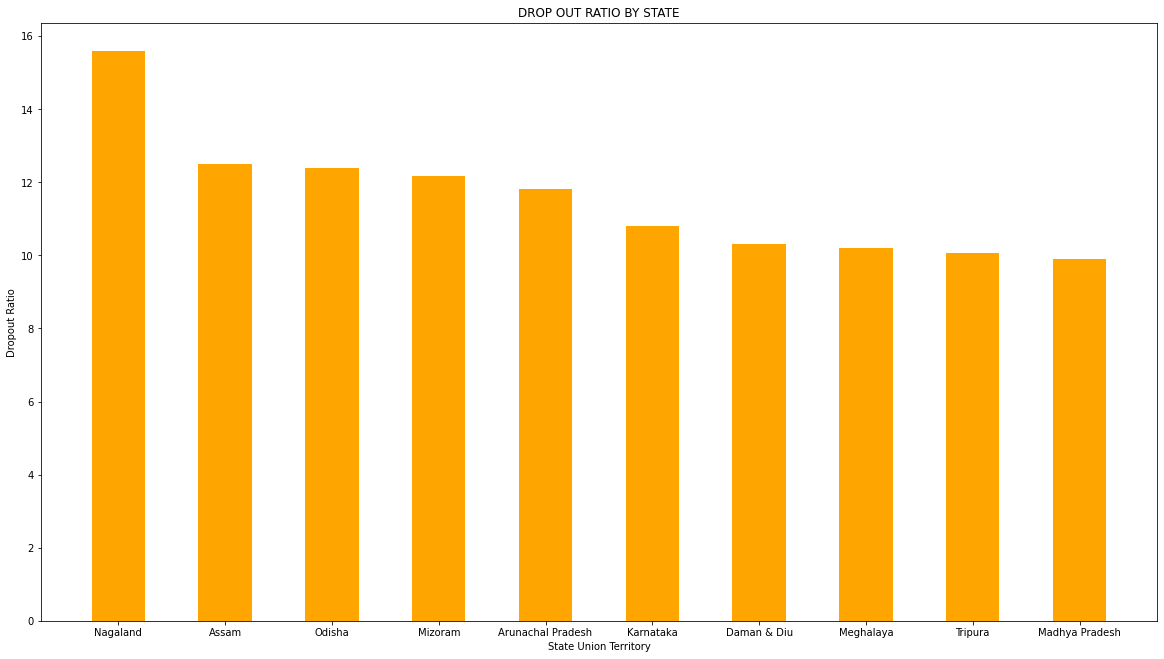

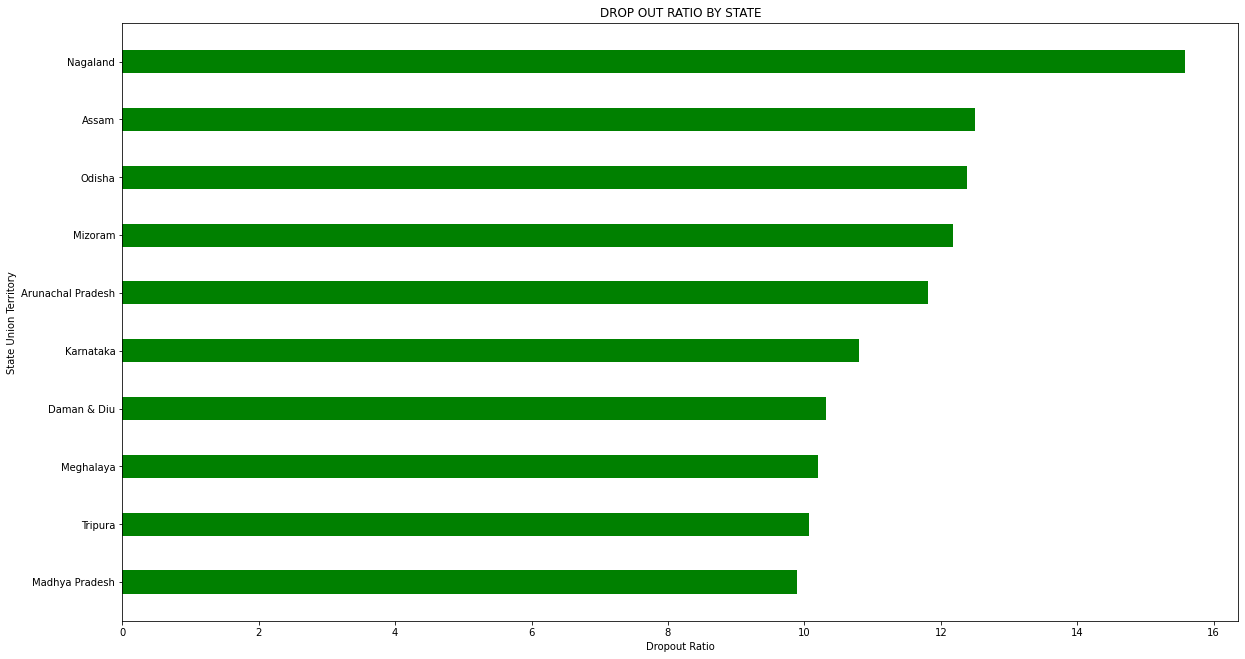

In [217]:
test=ps.sqldf("select  avg(Metric_value) value,STATE_UT from final_df where dataset='dropout' and Metric_name like '%TOTAL%' group by STATE_UT order by avg(Metric_value) desc limit 10")

plt.bar(x=test['STATE_UT'].to_list(),height=test['value'].to_list(),width=0.5,color='orange')
plt.xlabel('State Union Territory')
plt.ylabel('Dropout Ratio')
plt.title('DROP OUT RATIO BY STATE')
plt.gcf()

fig = plt.gcf()
fig.set_size_inches(20, 11)
fig.savefig('test2.png', dpi=100)
plt.show()


test=ps.sqldf("select  avg(Metric_value) value,STATE_UT from final_df where dataset='dropout' and Metric_name like '%TOTAL%' group by STATE_UT order by avg(Metric_value) desc limit 10")
test=test.sort_values(by='value',ascending=True)
plt.barh(y=test['STATE_UT'].to_list(),width=test['value'].to_list(),height=0.4,color='green')
plt.ylabel('State Union Territory')
plt.xlabel('Dropout Ratio')
plt.title('DROP OUT RATIO BY STATE')
plt.gcf()

fig = plt.gcf()
fig.set_size_inches(20, 11)
fig.savefig('test3.png', dpi=100)
plt.show()

### Do boys and girls have enough water and toilet facilities available?

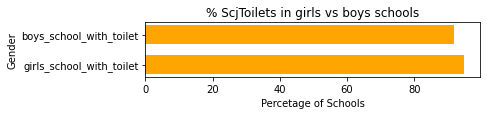

The Water Dataset has no breakdown by gender


,value,Gender
0,94.925091,None


In [176]:
test=ps.sqldf("select  avg(Metric_value) value,dataset from final_df where dataset like '%toilet%' and Metric_name='ALL_SCHOOLS'   group by dataset order by avg(Metric_value) desc limit 10")


fig=plt.gcf()
fig.set_size_inches(6, 1)
plt.barh(y=test['dataset'].to_list(),width=test['value'].to_list(),height=0.65,color='orange')
plt.ylabel('Gender')
plt.xlabel('Percetage of Schools')
plt.title('% ScjToilets in girls vs boys schools')
plt.get_backend()
plt.show()

print("The Water Dataset has no breakdown by gender")
test2=ps.sqldf("select  avg(Metric_value) value,Gender from final_df where dataset like '%water%' and Metric_name='ALL_SCHOOLS'    group by Gender order by avg(Metric_value) desc limit 10")
test2


### How is the Gross Enrollment ratio for boys and girls in various levels of schooling life?

<AxesSubplot:title={'center':'Gross Enrollment Ratio by Gender and Category'}, ylabel='Category'>

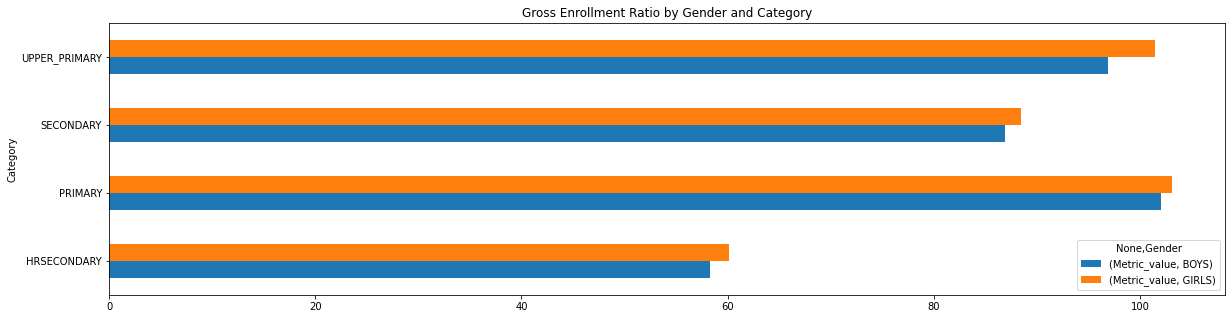

In [204]:
pd.DataFrame(final_df[(final_df['dataset']=='gross_enrollment')&(final_df['Gender']!='TOTAL')]['Metric_value'].groupby([final_df['Category'],final_df['Gender']]).mean()).unstack().plot(kind='barh',table=False,stacked=False,figsize=(20,5),title='Gross Enrollment Ratio by Gender and Category')


### Which level of school life is there less number of enrollment? Is it dropping or increasing?

Higher Secondary has the least number of enrollments however, there is no change in enrollment. Only PRIMARY level is going downwards 


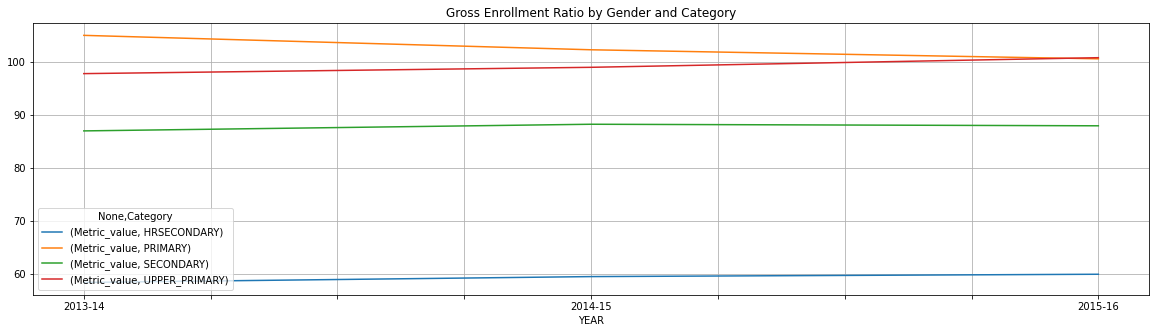

In [229]:
pd.DataFrame(final_df[(final_df['dataset']=='gross_enrollment')&(final_df['Gender']!='TOTAL')]['Metric_value'].groupby([final_df['YEAR'],final_df['Category']]).mean()).unstack().plot(kind='line',table=False,stacked=False,figsize=(20,5),title='Gross Enrollment Ratio by Gender and Category',use_index=True,grid=True)
print("Higher Secondary has the least number of enrollments however, there is no change in enrollment. Only PRIMARY level is going downwards ")

In [ ]:
final_df.plot()